In [1]:
from fastai.vision.all import *
from fastai.vision.gan import *
from fastai.distributed import *
from fastai.metrics import error_rate
from fastai.callback.tracker import SaveModelCallback
import torch 
from fastai.metrics import *

In [2]:
from models.backbone import Backbone
from models.encoder import EncoderModule
from models.utils.joiner2 import *
from models.utils.losses import *
from models.utils.metrics import Accuracy
from models.unet import UNet
from models.utils.misc import *
import torchvision.transforms as T
import torchvision.transforms as T
from torchvision import datasets, transforms, models
from collections import defaultdict, deque
import itertools

In [3]:
seed = 23456
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [4]:
H = 32
W= 32
bs = 5

transform = T.Compose([
T.Resize((H,W)),
T.ToTensor(),
])

In [5]:
path = untar_data(URLs.CIFAR)

transforms = ([*aug_transforms(),Normalize.from_stats([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

data = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=parent_label,
                 item_tfms=Resize(H,W),
                 batch_tfms=transforms)

dloader = data.dataloaders(path,bs=bs,device='cuda') 

In [35]:
class Generator_loss4(nn.Module):
    def __init__(self, beta=0.00005, gamma=0.005,sigma=1):
        super().__init__()
        self.beta = beta
        self.gamma = gamma
        self.sigma = sigma

    def forward(self, output, target):

        LCA = Curating_of_attention_loss()
        Latt = LCA(output[2])

        crossEntropy = nn.CrossEntropyLoss()
        model_loss = crossEntropy(output[0],target)
        
        MSE = nn.MSELoss()
        Lrec = MSE(output[4],output[3])
        
        #print(self.beta*Latt)
        #print(self.gamma*model_loss)
        #print(self.sigma*Lrec)
        
        Lg = TensorCategory(self.beta*Latt) - TensorCategory(self.gamma*model_loss) + TensorCategory(self.sigma*Lrec)
        #Lg = self.beta*Latt + self.sigma*Lrec
        #print("Loss generator:", Lg)

        return Lg

In [36]:
generator_loss = Generator_loss4(beta=0.00005, gamma=0.005,sigma=1)
critic_loss = CriticLoss()

In [37]:
gan = GAN(num_encoder_layers = 5, nhead=4, backbone = False, bypass=False, hidden_dim=256, batch_size=bs, image_h=H, image_w=W,grid_l=4,penalty_factor="1")

In [38]:
critic_learn = Learner(dloader, gan, loss_func=critic_loss, metrics=[Accuracy])

In [39]:
generator_learn = Learner(dloader, gan, loss_func=generator_loss)

In [52]:
epochs = 1

In [53]:
for e in range(epochs):
    print("Epoch", e+1)
    print("Generator training")
    #Generator Training
    for param in gan.generator.parameters():
        param.requires_grad = True
    for param in gan.model.parameters():
        param.requires_grad = False
    gan.noise_mode = True
    
    generator_learn.fit_one_cycle(1,0.001)
    
    print("Critit training without noised images")
    #Critit training without noised images
    for param in gan.generator.parameters():
        param.requires_grad = False
    fb = ["mask","penalty_mask","pos"]
    for name, p in gan.model.named_parameters(): 
        if name not in fb:
            p.requires_grad_(True)
    gan.noise_mode = False
    critic_learn.fit(1,2e-6)
    print("Critit training with noised images")
    #Critit training with noised images
    gan.noise_mode = True
    critic_learn.fit(1,2e-6)

Epoch 1
Generator training


epoch,train_loss,valid_loss,time
0,0.041052,0.041018,11:02


Critit training without noised images


TypeError: switcher() takes 0 positional arguments but 1 was given

In [46]:
for param in gan.generator.parameters():
    param.requires_grad = False
fb = ["mask","penalty_mask","pos"]
for name, p in gan.model.named_parameters(): 
    if name not in fb:
        p.requires_grad_(True)

In [49]:
gan.noise_mode = True

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=5.754399353463668e-06)

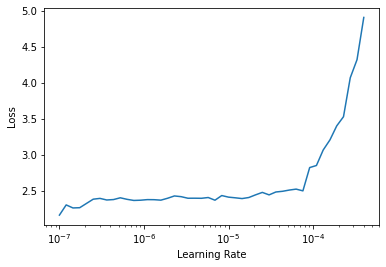

In [50]:
critic_learn.lr_find()

In [35]:
critic_learn.fit(1,2e-6)

epoch,train_loss,valid_loss,Accuracy,time
0,1.763650,1.701412,0.431750,09:57


torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Si

torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Si

torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Si

torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Si

torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Si

torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Si

torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Si

torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Si

torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Si

torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Si

torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Size([5])
torch.Size([5, 10])
torch.Si

In [43]:
for param in gan.generator.parameters():
    param.requires_grad = True
for param in gan.model.parameters():
    param.requires_grad = False

In [44]:
gan.noise_mode = True

SuggestedLRs(lr_min=0.15848932266235352, lr_steep=0.001737800776027143)

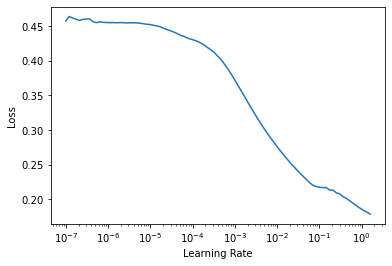

In [45]:
generator_learn.lr_find()